In [1]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt

## Data importing and preprocessing

In [2]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

## Directed Weighted Network Creation

In [3]:
# Creating networks and stroing them
coordinates = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0,index_col= 0)
print(coordinates)

graphs = []
passengers = []   # records number of total passengers(month wise)
lbls = []
for i in excel_list:
    path = "Raw_Data/"+i
    excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
    passengers.append(sum(excel["to"]) + sum(excel["from"]))
    lbls.append(i[:-4])
    G = nx.DiGraph()
    cities = {}
    for i in range(1,len(excel)+1):
        cities[excel["city1"][i]] = (coordinates["Longitude"][excel["city1"][i]],coordinates["Latitude"][excel["city1"][i]])
        cities[excel["city2"][i]] = (coordinates["Longitude"][excel["city2"][i]],coordinates["Latitude"][excel["city2"][i]])
    for i in cities:
        G.add_node(i, pos= cities[i])
    
    print(path)
    for i in range(1,len(excel)+1):
        weight1 = excel["to"][i]
        if(weight1 != 0):
            G.add_edge(excel["city1"][i],excel["city2"][i],weight=weight1)
        weight2 = excel["from"][i]
        if(weight2 != 0):
            G.add_edge(excel["city2"][i],excel["city1"][i],weight=weight2)
    graphs.append(G)
nx.write_gml(graphs[-7], "test.gml", stringizer = str)
#print(cities)

               Latitude  Longitude
Cities                            
ADAMPUR          31.430     75.750
AGARTALA         23.887     91.240
AGATTI ISLAND    10.824     72.176
AGRA             27.156     77.961
AHMEDABAD        23.077     72.635
...                 ...        ...
VADODARA         22.336     73.226
VARANASI         25.452     82.859
VIDYANAGAR       15.170     76.620
VIJAYAWADA       16.530     80.797
VISAKHAPATNAM    17.721     83.224

[119 rows x 2 columns]
Raw_Data/1505.csv
Raw_Data/1506.csv
Raw_Data/1507.csv
Raw_Data/1508.csv
Raw_Data/1509.csv
Raw_Data/1510.csv
Raw_Data/1511.csv
Raw_Data/1512.csv
Raw_Data/1601.csv
Raw_Data/1602.csv
Raw_Data/1603.csv
Raw_Data/1604.csv
Raw_Data/1605.csv
Raw_Data/1606.csv
Raw_Data/1607.csv
Raw_Data/1608.csv
Raw_Data/1609.csv
Raw_Data/1610.csv
Raw_Data/1611.csv
Raw_Data/1612.csv
Raw_Data/1701.csv
Raw_Data/1702.csv
Raw_Data/1703.csv
Raw_Data/1704.csv
Raw_Data/1705.csv
Raw_Data/1706.csv
Raw_Data/1707.csv
Raw_Data/1708.csv
Raw_Data/1709.csv

In [4]:
metrocity = ["MUMBAI","DELHI","KOLKATA","BENGALURU","CHENNAI","HYDERABAD"]
for i in range(len(lbls)):
    normalcity = [i for i in graphs[i].nodes() if i not in metrocity]
    print(i)
    #print(graphs[i].nodes())
    pos = nx.get_node_attributes(graphs[i],'pos')
    nx.draw_networkx_nodes(graphs[i], pos, nodelist=metrocity, node_color="r")
    nx.draw_networkx(graphs[i],pos,nodelist=normalcity, node_color="g",font_color="b",font_size = 18)
    #nx.write_gml(graphs[i], "test.gml", stringizer = str)
    figure = plt.gcf()
    figure.set_size_inches(30, 30)
    plt.title("Airport Network Of India "+ lbls[i]+ "(YYMM Format")
    plt.savefig('Output_Files/matplotlib/map'+lbls[i])
    plt.axis()
    plt.clf()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65


<Figure size 2160x2160 with 0 Axes>

## Network Visualization

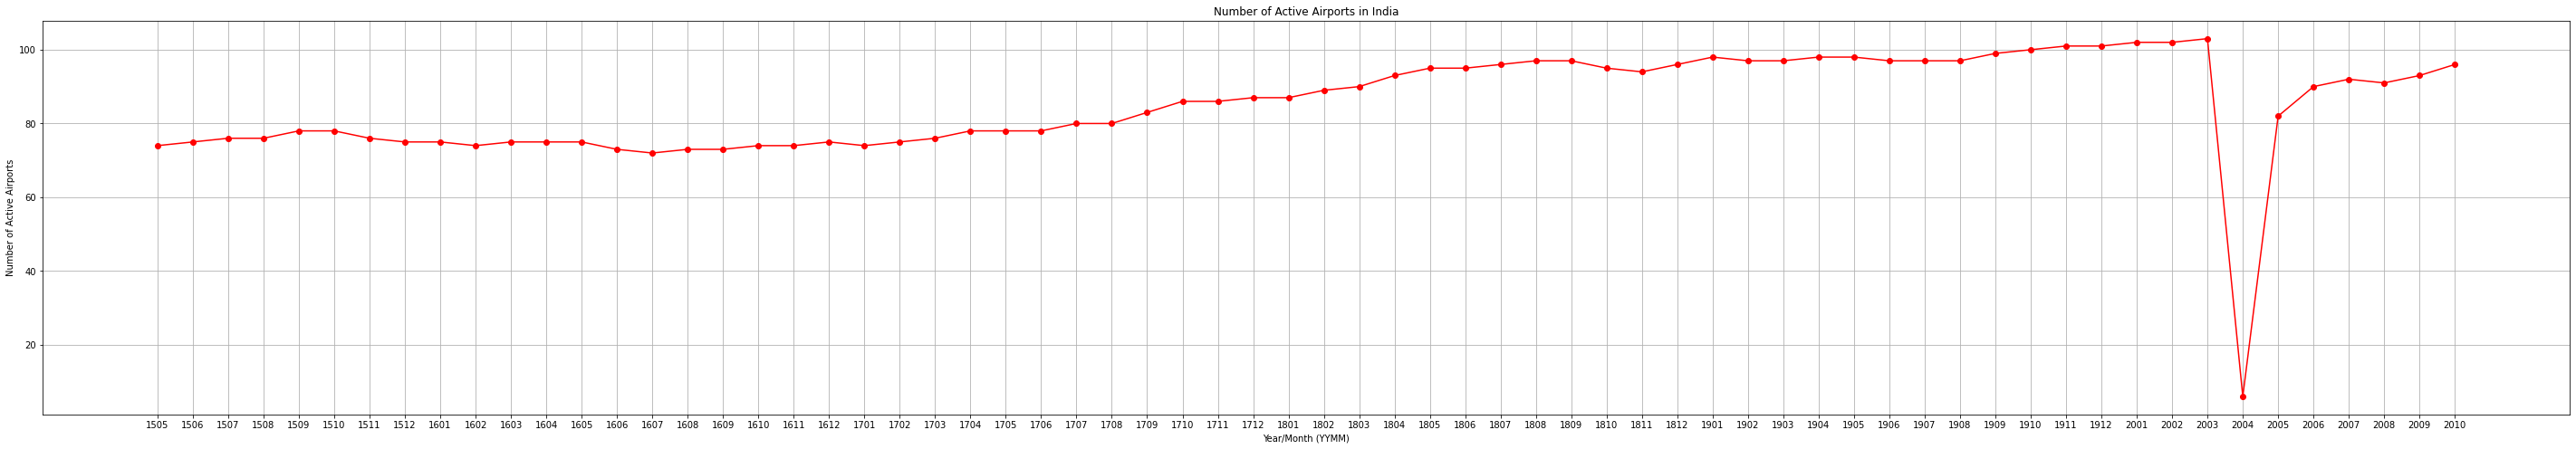

In [5]:
nodes = []
for i in range(len(graphs)):
    nodes.append(len(graphs[i].nodes()))

plt.plot(nodes, color="red", marker="o")
plt.xlabel("Year/Month (YYMM)")
plt.xticks([i for i in range(66)], labels = lbls)
plt.ylabel("Number of Active Airports")
plt.title("Number of Active Airports in India")
plt.grid(True)

figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/nodes')
plt.show()

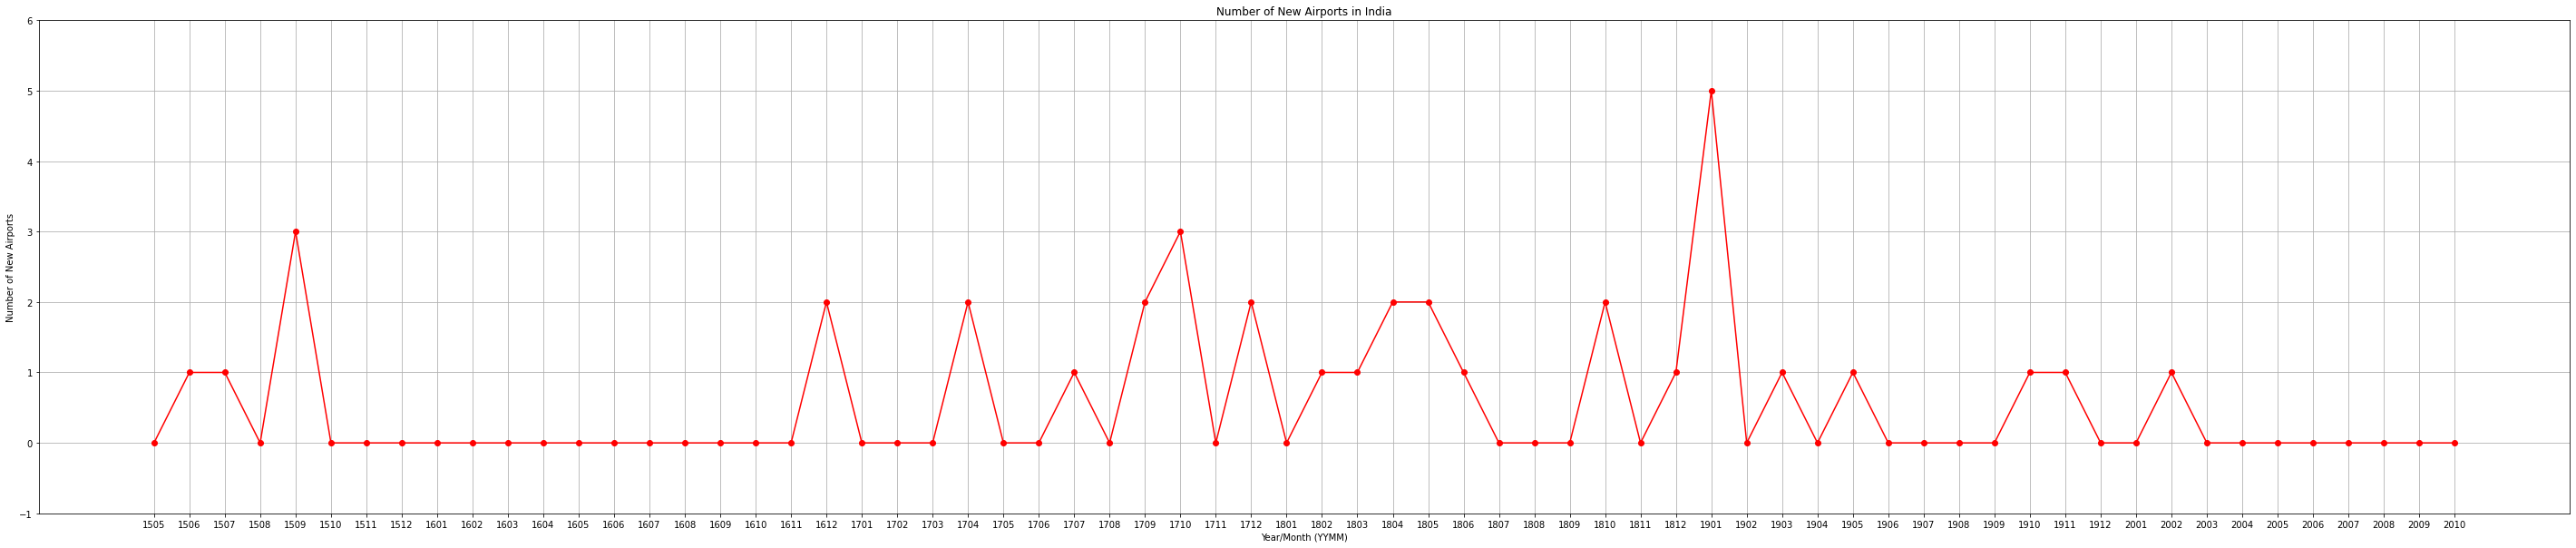

In [6]:
nnodes = []
airpor = {} 
for i in range(len(graphs)):
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
    nnodes.append(temp)
nnodes[0] = 0
plt.plot(nnodes, color="red", marker="o")
plt.xlabel("Year/Month (YYMM)")
plt.xticks([i for i in range(66)], labels = lbls)
plt.ylabel("Number of New Airports")
plt.title("Number of New Airports in India")
plt.grid(True)
plt.ylim(-1,6)
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.savefig('Output_Files/matplotlib/newnodes')
plt.show()

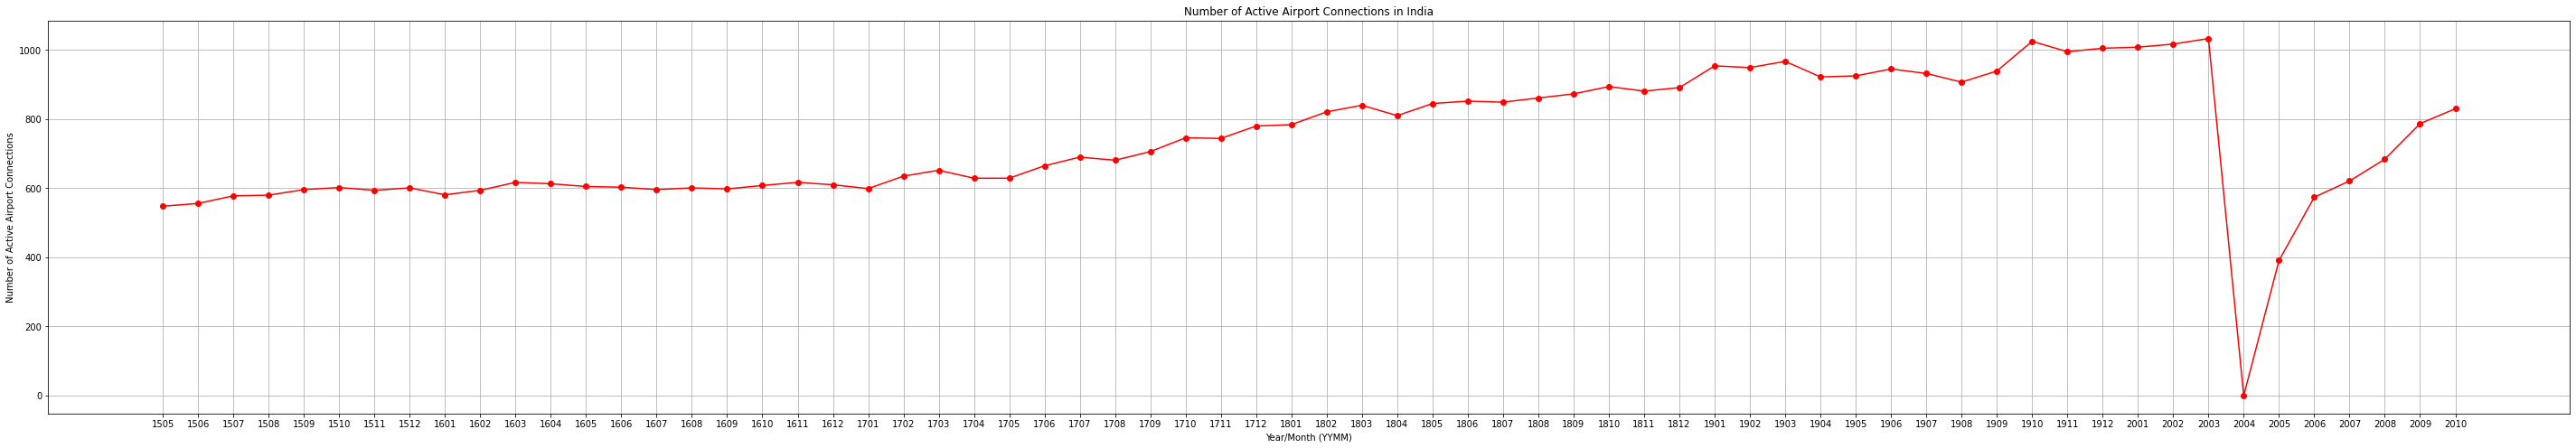

In [7]:
edges = []
for i in range(len(graphs)):
    edges.append(len(graphs[i].edges()))
plt.plot(edges, color="red", marker="o")
plt.xlabel("Year/Month (YYMM)")
plt.xticks([i for i in range(66)], labels = lbls)
plt.ylabel("Number of Active Airport Connections")
plt.title("Number of Active Airport Connections in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/edges')
plt.show()

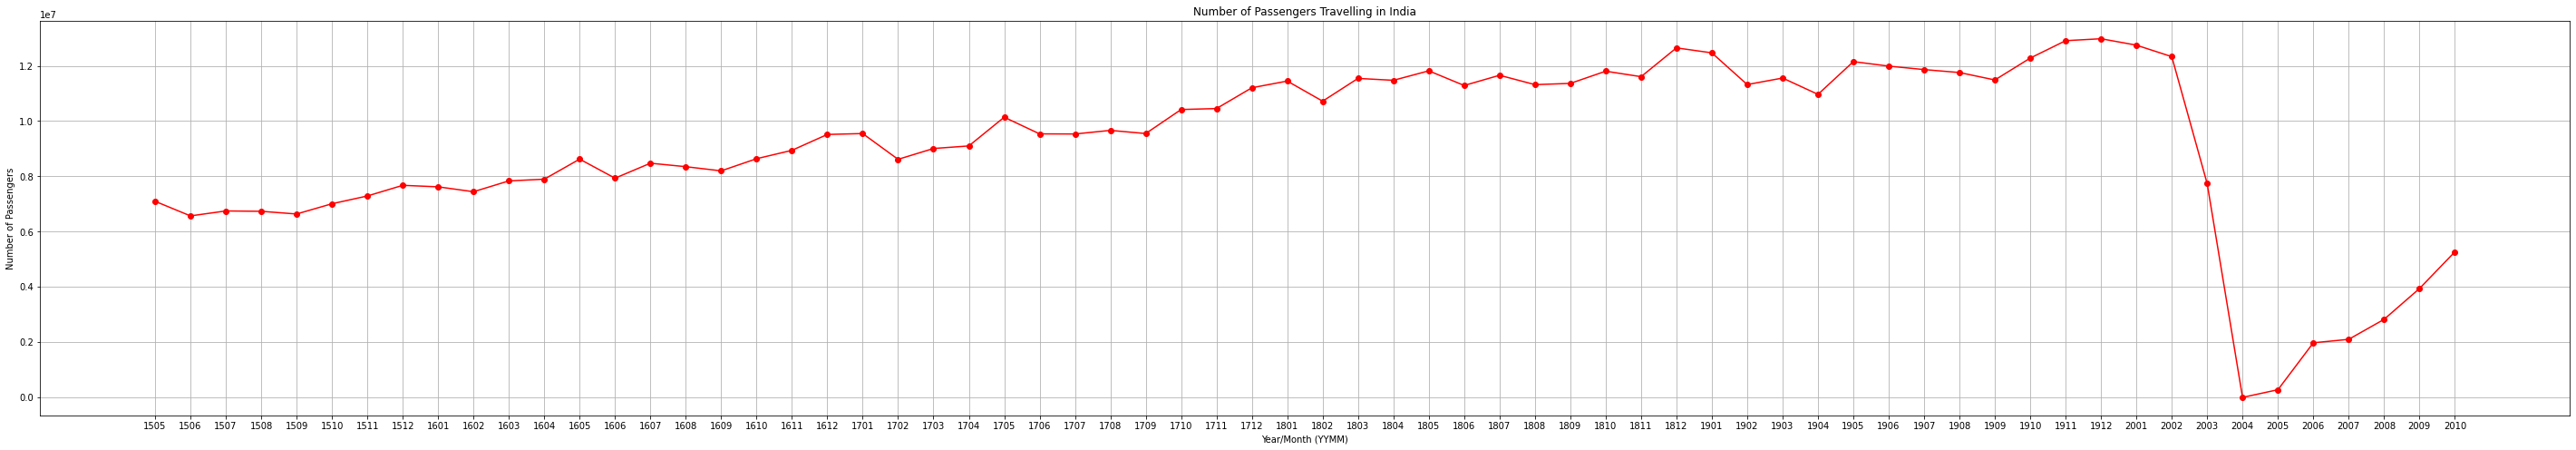

In [8]:
plt.plot(passengers, color="red",  marker="o")
plt.xlabel("Year/Month (YYMM)")
plt.xticks([i for i in range(66)],labels = lbls)
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Travelling in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/passengers')
plt.show()

In [9]:
for i in sorted(airpor.keys()):
    print(i)

ADAMPUR
AGARTALA
AGATTI ISLAND
AGRA
AHMEDABAD
AIZAWL
AJMER
ALLAHABAD
AMRITSAR
AURANGABAD
BAGDOGRA
BELGAUM
BENGALURU
BHATINDA
BHAVNAGAR
BHOPAL
BHUBANESWAR
BHUJ
BIDAR AIRPORT, KARNATAKA
BIKANER
CHANDIGARH
CHENNAI
COCHIN
COIMBATORE
CUDDAPAH
DABOLIM
DEHRA DUN
DELHI
DHARAMSALA
DIBRUGARH
DIMAPUR
DIU
DURGAPUR
GANGTOK
GAYA
GHAZIABAD
GOA
GORAKHPUR
GUWAHATI
GWALIOR
HUBLI
HYDERABAD
IMPHAL
INDORE
JABALPUR
JAGDALPUR
JAIPUR
JAISALMER
JALGAON
JAMMU
JAMNAGAR
JHARSUGUDA
JODHPUR
JORHAT
Jharsuguda
KADAPA
KALABURAGI, KARNATAKA
KANDLA
KANNUR
KANPUR
KHAJURAHO
KOCHI
KOLHAPUR
KOLKATA
KOZHIKODE
KULLU
LEH
LILABARI
LUCKNOW
LUDHIANA
MADURAI
MANGALORE
MUMBAI
MUNDRA
MYSORE
NAGPUR
NANDED
NASIK
PAKYONG
PANTNAGAR
PASIGHAT
PATHANKOT
PATNA
PITHORAGARH
PONDICHERRY
PORBANDAR
PORT BLAIR
PUDUCHERRY
PUNE
RAIPUR
RAJAHMUNDRY
RAJKOT
RANCHI
SALEM
SHILLONG
SHIRDI
SILCHAR
SIMLA
SRINAGAR
SURAT
TEZPUR
TIRUCHIRAPALLY
TIRUPATI
TRIVANDRUM
TUTICORIN
UDAIPUR
VADODARA
VARANASI
VIDYANAGAR
VIJAYAWADA
VISAKHAPATNAM


excel = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0)
tempcity = list(excel["Cities"])
#print(tempcity)
for i in sorted(airpor.keys()):
    if i not in tempcity:
        print(i)